<a href="https://colab.research.google.com/github/VishalSingh2610/Projects_of_Bharat_Intern/blob/main/WineQualityPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [53]:
# @title Import Libraries
#Importing required packages.

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
%matplotlib inline


**Choose Dataset from Local Directory**

In [2]:
from google.colab import files
uploaded = files.upload()

Saving winequality-red.csv to winequality-red.csv


**Load Dataset**

In [3]:
dataset = pd.read_csv("winequality-red.csv")
dataset

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


**Summarize Dataset**

In [4]:
print(dataset.shape)
print(dataset.head())

(1599, 12)
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.

**Information About Dataset**

In [5]:
print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB
None


**Description about Dataset**

In [6]:
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1599.0,8.319637,1.741096,4.60000,7.1000,7.90000,9.200000,15.90000
volatile acidity,1599.0,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000
citric acid,1599.0,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000
residual sugar,1599.0,2.538806,1.409928,0.90000,1.9000,2.20000,2.600000,15.50000
chlorides,1599.0,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100
free sulfur dioxide,1599.0,15.874922,10.460157,1.00000,7.0000,14.00000,21.000000,72.00000
total sulfur dioxide,1599.0,46.467792,32.895324,6.00000,22.0000,38.00000,62.000000,289.00000
density,1599.0,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369
pH,1599.0,3.311113,0.154386,2.74000,3.2100,3.31000,3.400000,4.01000
sulphates,1599.0,0.658149,0.169507,0.33000,0.5500,0.62000,0.730000,2.00000


**Checking for Missing Values in our Dataset**

In [7]:
dataset.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

**If Missing Values present then fill the Missing Values by means**

In [56]:
# for col in dataset.columns:
#   if dataset[col].isnull().sum() > 0:
#     dataset[col] = dataset[col].fillna(dataset[col].mean())

# dataset.isna().sum()

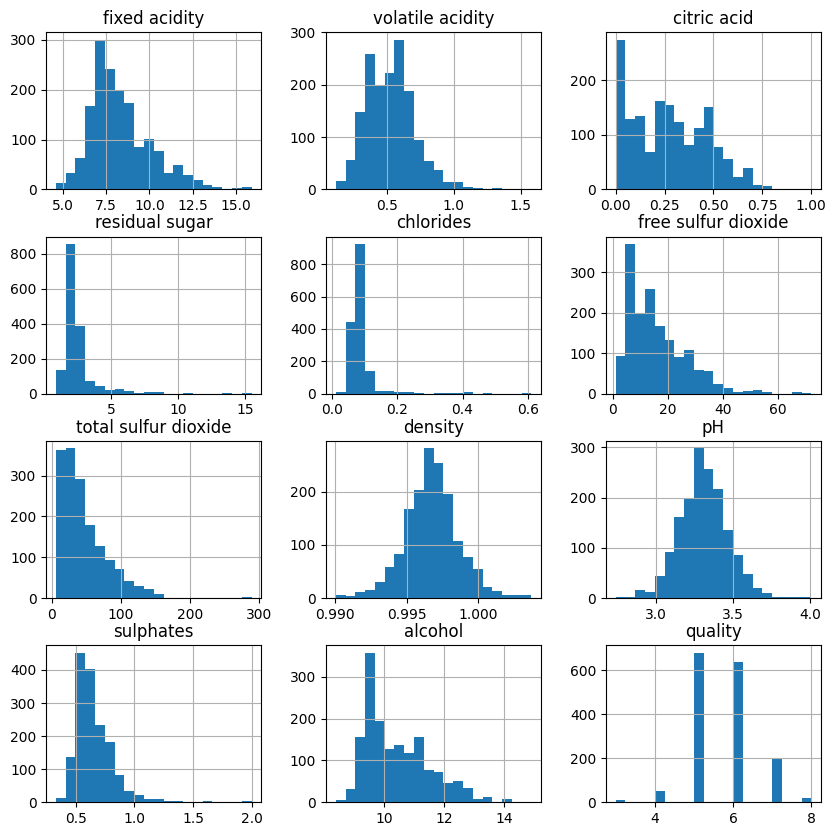

In [9]:
# @title Data Visualization
# draw the histogram to visualise the distribution of the data with continuous values in the columns of the dataset

dataset.hist(bins=20, figsize=(10, 10))
plt.show()

**Draw Different Bar charts with quality and other features**

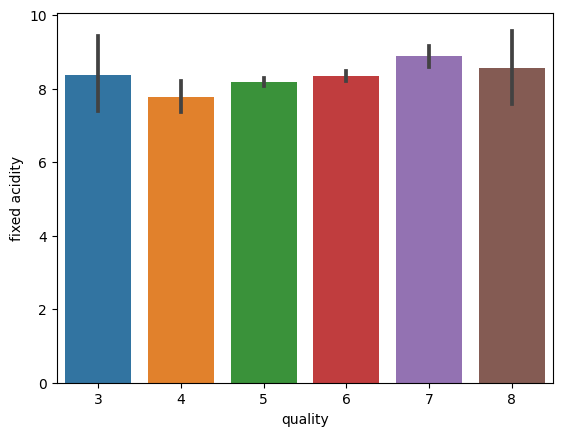

In [10]:
sns.barplot(x='quality',y = 'fixed acidity',data = dataset)
plt.show()

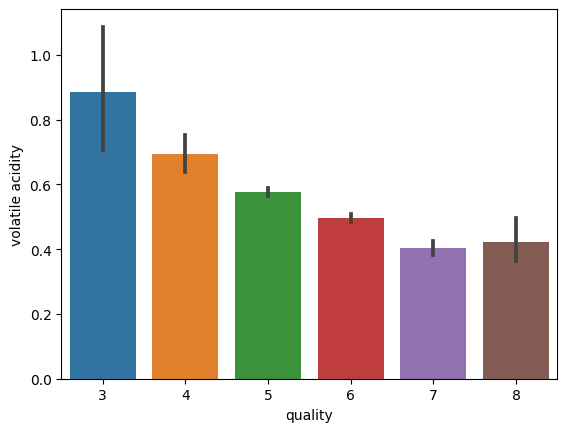

In [11]:
sns.barplot(x = 'quality', y = 'volatile acidity', data = dataset)
plt.show()

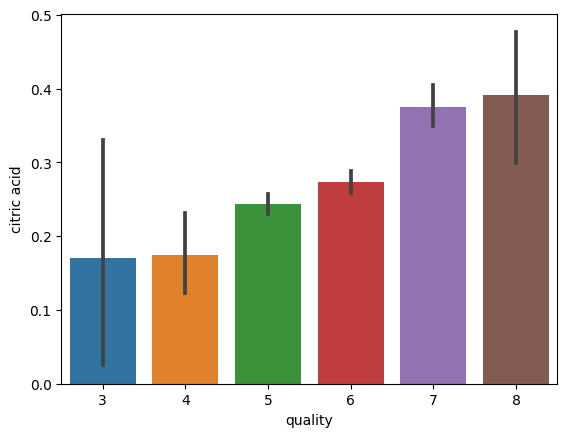

In [12]:
sns.barplot(x='quality', y='citric acid', data=dataset)
plt.show()

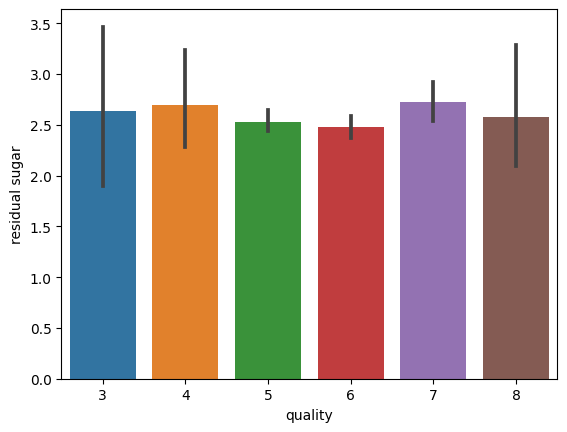

In [13]:
sns.barplot(x='quality', y='residual sugar', data=dataset)
plt.show()

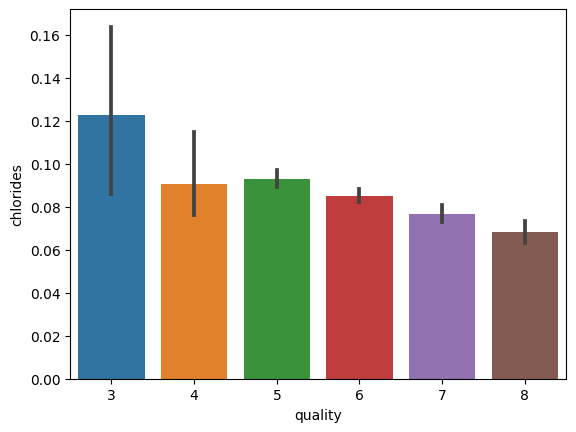

In [14]:
sns.barplot(x='quality', y='chlorides', data=dataset)
plt.show()

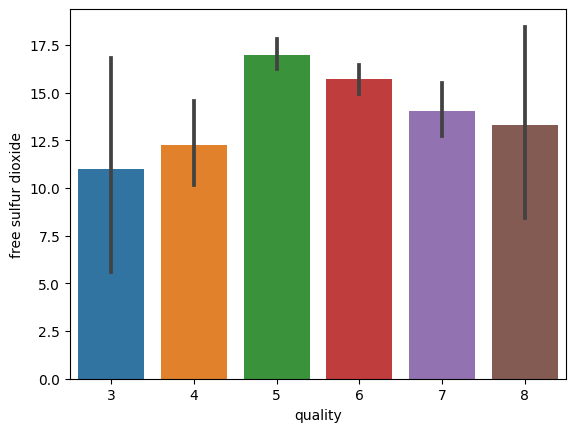

In [15]:
sns.barplot(x='quality', y='free sulfur dioxide', data=dataset)
plt.show()

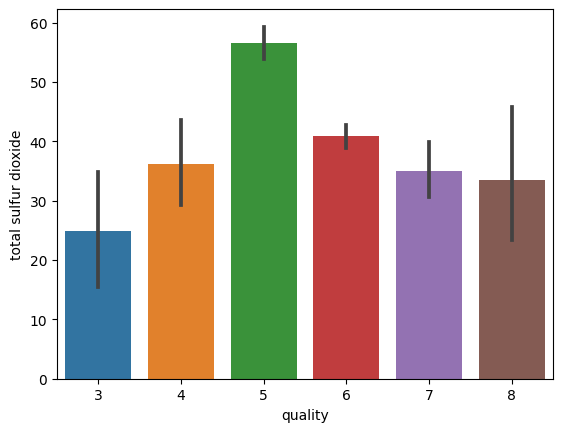

In [16]:
sns.barplot(x='quality', y='total sulfur dioxide', data=dataset)
plt.show()

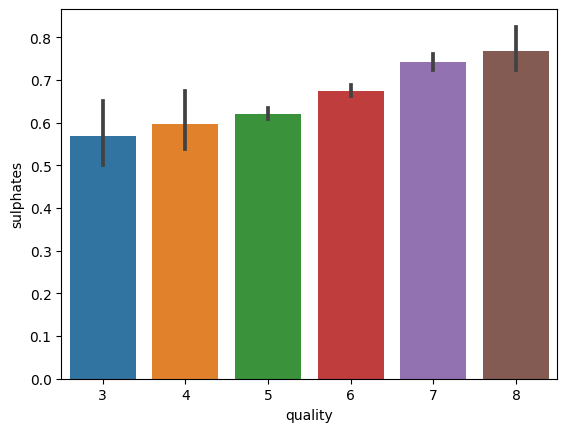

In [17]:
sns.barplot(x='quality', y='sulphates', data=dataset)
plt.show()

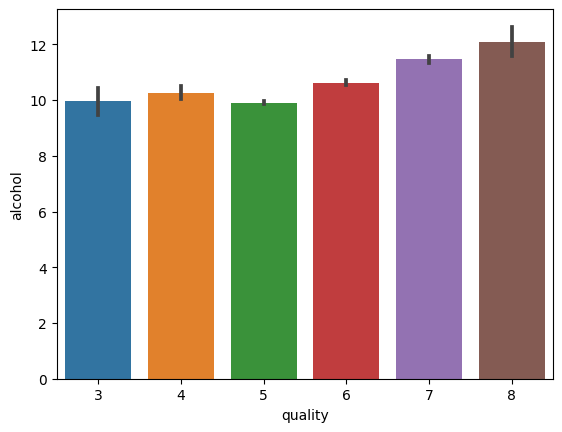

In [18]:
sns.barplot(x='quality', y='alcohol', data=dataset)
plt.show()

In [19]:
# @title Preprocessing Data for performing Machine learning algorithms

#Making binary classificaion for the response variable.
#Dividing wine as good and bad by giving the limit for the quality

bins = [2, 6.5, 8]
labels = ['bad', 'good']
dataset['quality'] = pd.cut(dataset['quality'], bins = bins, labels = labels)


**Create a LabelEncoder instance**

In [20]:
label_quality = LabelEncoder()

**Fit and transform the 'quality' column to numerical labels bad becomes 0 and good becomes 1**

In [21]:
dataset['quality'] = label_quality.fit_transform(dataset['quality'])

**Count 0's and 1's in 'quality' column**

In [22]:
dataset['quality'].value_counts()

dataset.to_csv('newdata.csv',index=False)

**Plotting a Count Plot for 'quality' column**

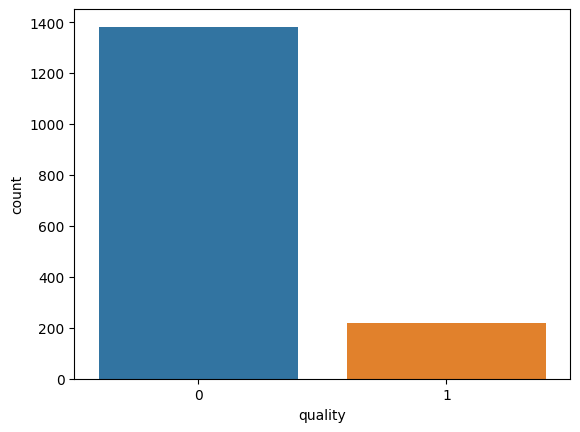

In [23]:
sns.countplot(x='quality', data=dataset)
plt.show()

In [24]:
# @title Now Segregating the dataset into Input data(dependent variables) and Output data(independent variables)

X = dataset.drop('quality', axis=1)
X.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


In [25]:
Y = dataset['quality']

In [27]:
# @title Split the data into Train and Test data
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.25, random_state = 0)

In [29]:
# @title Applying Standard scaling to get optimized result
sc = StandardScaler()

x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)


In [32]:
# @title Random Forest Classifier

model = RandomForestClassifier(n_estimators=200)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)


In [40]:
# @title Let's see how our model performed

print("The Accuracy of Model: {0}%".format(accuracy_score(y_test,y_pred)*100))
print(classification_report(y_test, y_pred))


The Accuracy of Model: 92.75%
              precision    recall  f1-score   support

           0       0.95      0.97      0.96       355
           1       0.74      0.56      0.63        45

    accuracy                           0.93       400
   macro avg       0.84      0.77      0.80       400
weighted avg       0.92      0.93      0.92       400



In [41]:
# @title Confusion matrix for the random forest classification

print(confusion_matrix(y_test, y_pred))


[[346   9]
 [ 20  25]]


In [43]:
# @title Support Vector Classifier

model1 = SVC()
model1.fit(x_train,y_train)
y_pred1 = model1.predict(x_test)


**Performance of Model**

In [44]:
print("The Accuracy of Model: {0}%".format(accuracy_score(y_test,y_pred1)*100))
print(classification_report(y_test,y_pred1))

The Accuracy of Model: 91.0%
              precision    recall  f1-score   support

           0       0.92      0.98      0.95       355
           1       0.71      0.33      0.45        45

    accuracy                           0.91       400
   macro avg       0.82      0.66      0.70       400
weighted avg       0.90      0.91      0.90       400



In [45]:
# @title Let's try to increase our accuracy of models

#Finding best parameters for our SVC model

param = {
    'C': [0.1,0.8,0.9,1,1.1,1.2,1.3,1.4],
    'kernel':['linear', 'rbf'],
    'gamma' :[0.1,0.8,0.9,1,1.1,1.2,1.3,1.4]
}
grid_svc = GridSearchCV(model1, param_grid=param, scoring='accuracy', cv=10)


In [46]:
grid_svc.fit(x_train, y_train)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': [0.1, 0.8, 0.9, 1, 1.1, 1.2, 1.3, 1.4],
                         'gamma': [0.1, 0.8, 0.9, 1, 1.1, 1.2, 1.3, 1.4],
                         'kernel': ['linear', 'rbf']},
             scoring='accuracy')

In [47]:
grid_svc.best_params_

{'C': 1.2, 'gamma': 1.4, 'kernel': 'rbf'}

In [48]:
#Let's run our SVC again with the best parameters.
model2 = SVC(C=1.2,gamma=1.4,kernel='rbf')
model2.fit(x_train,y_train)
y_pred2 = model2.predict(x_test)

print("The Accuracy of Model: {0}%".format(accuracy_score(y_test,y_pred2)*100))
print(classification_report(y_test,y_pred2))

The Accuracy of Model: 91.75%
              precision    recall  f1-score   support

           0       0.93      0.98      0.95       355
           1       0.75      0.40      0.52        45

    accuracy                           0.92       400
   macro avg       0.84      0.69      0.74       400
weighted avg       0.91      0.92      0.91       400



In [55]:
# @title Cross Validation Score for random forest

rfc_eval = cross_val_score(estimator = model, X = x_train, y = y_train, cv = 10)
rfc_eval.mean()


0.9024159663865546